In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import requests
# import ipywidgets as widgets
# from ipywidgets.embed import embed_minimal_html
import gmaps
import os
import csv

# Import API key
from menu_key import ow_api_key, census_api_key
from menu_key import gkey
gmaps.configure(api_key=gkey)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
# output_data_file = "output_data/cities.csv"
print("HELLO")

HELLO


In [2]:
# Read CSV
demo_data_ = pd.read_csv("Resources/Demographics_Age_Analytics.csv")
# Drop all rows with missing information
demo_data = demo_data_.dropna(how='any')
demo_data.head()

,Age Group,Gender,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration (Seconds),Transactions,Revenue,Ecommerce Conversion Rate
0,18-24,female,364,323,605,1.32,9.99,220.9,3,1027.16,0.50
1,18-24,male,199,176,316,3.16,7.53,165.7,2,718.70,0.63
2,25-34,female,2219,1914,3389,1.56,9.13,187.5,21,12777.24,0.62
3,25-34,male,1244,1087,1933,2.79,9.68,236.7,13,4663.73,0.67
4,35-44,female,1059,890,1745,2.29,8.91,172.1,14,3868.08,0.80


<Figure size 1008x588 with 0 Axes>

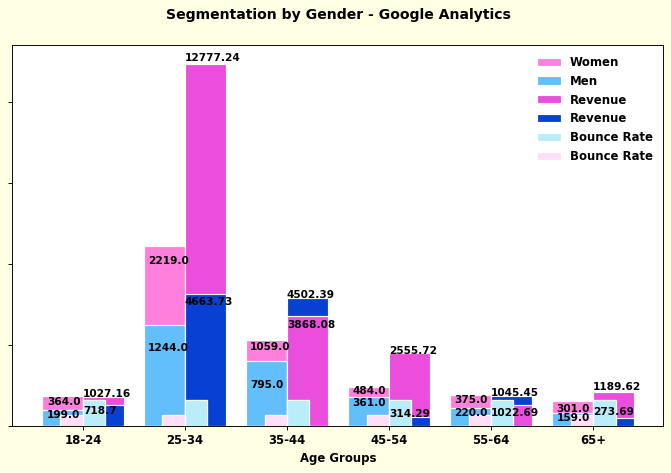

In [3]:
# fig = plt.figure(figsize=(10,5), dpi=84)
# fig.patch.set_facecolor('xkcd:off white')

# demo_gen_count = demo_data.groupby("Gender").count()
# demo_agegroup_count = demo_data.groupby("Age Group").count()

gender_unique_redux = demo_data[["Gender"]]
gender_counts = gender_unique_redux["Gender"].value_counts()

female_18_24 = demo_data.loc[(demo_data['Age Group'] == '18-24') & (demo_data['Gender'] == 'female')]
male_18_24 = demo_data.loc[(demo_data['Age Group'] == '18-24') & (demo_data['Gender'] == 'male')]
g18_24 = demo_data['Ecommerce Conversion Rate'].reset_index(drop=True).astype(float)
revenue = demo_data['Revenue'].reset_index(drop=True).astype(float)
female_35_44_ = demo_data.loc[(demo_data['Age Group'] == '35-44') & (demo_data['Gender'] == 'female')]
female_35_44 = female_35_44_['Revenue'].reset_index(drop=True).astype(float)
female_55_64_ = demo_data.loc[(demo_data['Age Group'] == '55-64') & (demo_data['Gender'] == 'female')]
female_55_64 = female_55_64_['Revenue'].reset_index(drop=True).astype(float)

female_18_24_conversion_ = demo_data.loc[(demo_data['Age Group'] == '18-24') & (demo_data['Gender'] == 'female')]
female_18_24_conversion = female_18_24_conversion_['Bounce Rate'].reset_index(drop=True).astype(float)
male_18_24_conversion_ = demo_data.loc[(demo_data['Age Group'] == '18-24') & (demo_data['Gender'] == 'male')]
male_18_24_conversion = male_18_24_conversion_['Bounce Rate'].reset_index(drop=True).astype(float)


# age_chart = demo_data.groupby("Age Group").plot(kind="bar", title="Gender")
# gender_chart = demo_data.groupby("Gender").plot(kind="bar", title="Gender")

# ax = fig.add_subplot(111)
# gender_fig1 = plt.bar(demo_data["Age Group"], demo_data["Users"], color = ['#FF8080','#00FFFF'])
# gender_fig2 = plt.bar(demo_data["Age Group"], demo_data["Revenue"], color = ['g','b'])
fig = plt.figure(figsize=(12,7), dpi=84)
fig, ax_ = plt.subplots(figsize=(10,6), dpi=84 ) 
fig.patch.set_facecolor('xkcd:off white')
# plt.style.use('classic')



ax_ = plt.subplot(111)
ax_.bar(demo_data["Age Group"], demo_data["Users"], color = ['#ff80dc','#62bffc'], width=-0.4, align='edge',edgecolor='white', label='Women')
ax_.bar(demo_data["Age Group"], 0, color = ['#62bffc'], width=-0.4, align='edge',edgecolor='white', label='Men')

ax_.bar(demo_data["Age Group"], demo_data["Revenue"]*.35, color = ['#eb4ddc','#0641d4'], width=0.4, align='edge',edgecolor='white')
ax_.bar(demo_data["Age Group"][5], female_35_44*.35, color = ['#eb4ddc','#0641d4'], width=0.4, align='edge',edgecolor='white', label='Revenue')
ax_.bar(demo_data["Age Group"][5], 0, color = ['#0641d4'], width=0.4, align='edge',edgecolor='white', label='Revenue')

ax_.bar(demo_data["Age Group"][9], female_55_64*.25, color = ['#eb4ddc','#0641d4'], width=0.4, align='edge',edgecolor='white')


# ax_.bar(demo_data["Age Group"], g18_24*400, color = ['y','r'], width=.4, align='center')
ax_.bar(demo_data["Age Group"], male_18_24_conversion*100, color = ['#b9edfa'], width=.22, align='edge',edgecolor='white', label='Bounce Rate')
ax_.bar(demo_data["Age Group"], female_18_24_conversion*100, color = ['#ffdef6'], width=-.22, align='edge',edgecolor='white', label='Bounce Rate')

ax_.set_yticklabels([])


plt.title(f"Segmentation by Gender - Google Analytics", fontweight="bold", y=1.05)
plt.xlabel("Age Groups", fontweight="bold", backgroundcolor = 'xkcd:off white')
plt.ylabel("", fontweight="bold", rotation=90, horizontalalignment='right', y=.7, backgroundcolor = 'xkcd:off white')

#################### SUPTITLE #####################
female_rev_label_ = demo_data.loc[(demo_data['Revenue'] >=0 ) & (demo_data['Gender'] == 'female') ]  # & (demo_data['Age Group'] == '18-24')
female_rev_label  = female_rev_label_["Revenue"].reset_index(drop=True).astype(float)
male_rev_label_ = demo_data.loc[(demo_data['Revenue'] >=0 ) & (demo_data['Gender'] == 'male') ]  # & (demo_data['Age Group'] == '18-24')
male_rev_label  = male_rev_label_["Revenue"].reset_index(drop=True).astype(float)

female_label  = female_rev_label_["Users"].reset_index(drop=True).astype(float)
male_label  = male_rev_label_["Users"].reset_index(drop=True).astype(float)
fontColor = "#000000"
plt.text(0, (female_rev_label[0]*.35), female_rev_label[0], fontsize=9)
plt.text(0, (male_rev_label[0]*.2), male_rev_label[0], fontsize=9, color=fontColor)
plt.text(1, (female_rev_label[1]*.353), female_rev_label[1], fontsize=9)
plt.text(1, (male_rev_label[1]*.32), male_rev_label[1], fontsize=9, color=fontColor)
plt.text(2, (female_rev_label[1]*.095), female_rev_label[2], fontsize=9)
plt.text(2, (male_rev_label[1]*.34), male_rev_label[2], fontsize=9, color=fontColor)
plt.text(3, (female_rev_label[1]*.07), female_rev_label[3], fontsize=9)
plt.text(3, (male_rev_label[1]*.025), male_rev_label[3], fontsize=9, color=fontColor)
plt.text(4, (female_rev_label[1]*.01), female_rev_label[4], fontsize=9)
plt.text(4, (male_rev_label[1]*.08), male_rev_label[4], fontsize=9, color=fontColor)
plt.text(5, (female_rev_label[1]*.035), female_rev_label[5], fontsize=9)
plt.text(5, (male_rev_label[1]*.03), male_rev_label[5], fontsize=9, color=fontColor)

plt.text(-.35, (female_label[0]*.7), female_label[0], fontsize=9)
plt.text(-.35, (male_label[0]*.5), male_label[0], fontsize=9, color="black")
plt.text(0.64, (female_label[1]*.9), female_label[1], fontsize=9)
plt.text(0.64, (male_label[1]*.74), male_label[1], fontsize=9, color="black")
plt.text(1.64, (female_label[1]*.42), female_label[2], fontsize=9)
plt.text(1.64, (male_label[1]*.38), male_label[2], fontsize=9, color="black")
plt.text(2.64, (female_label[1]*.18), female_label[3], fontsize=9)
plt.text(2.64, (male_label[1]*.2), male_label[3], fontsize=9, color="black")
plt.text(3.64, (female_label[1]*.13), female_label[4], fontsize=9)
plt.text(3.64, (male_label[1]*.1), male_label[4], fontsize=9, color="black")
plt.text(4.64, (female_label[1]*.08), female_label[5], fontsize=9)
plt.text(4.64, (male_label[1]*.05), male_label[5], fontsize=9, color="black")

####### Busted needs new var names from above replaced.##
# female_18_24_rev_label_title_00 = fig.suptitle(female_18_24_rev_label[0], fontsize=10, weight="medium", backgroundcolor = '#00000000',
#             color="black", horizontalalignment='center', va = 'top', 
#             x=.21, y=(female_18_24_rev_label[0]/5500), alpha=1)
# female_18_24_rev_label_title_01 = fig.suptitle(female_18_24_rev_label[1], fontsize=10, weight="medium", backgroundcolor = '#00000000',
#              color="black", horizontalalignment='center',va = 'top', 
#              x=.34, y=(female_18_24_rev_label[1]/14400), alpha=1)
#####################################################

# plt.subplots_adjust(top=0.9) ## pushes it up 

lgnd = plt.legend(loc="best", fontsize=10, 
                  title="", title_fontsize=12, facecolor="white", frameon=False, framealpha=1)
# rcParams["legend.shadow"] = False
# lgnd.legendHandhttp://localhost:8888/notebooks/jaguars_project/jaguar4.ipynb#les[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]

plt.ylim(0, 4700)
# fig.tight_layout()
# plt.plot([0, 1, 2, 3, 4, 5], [1000, 4000, 2500, 4500, 1400, 3600])


plt.show()
female_rev_label[0]
female_label
# print(plt.style.available)

# type(test)
fig.savefig("Images/Segmentation_Gender_Age.png", facecolor=fig.get_facecolor())
